<a href="https://colab.research.google.com/github/wayaadhyasta/Prediksi-Nilai-Tukar-Rupiah-terhadap-Dolar-AS-Menggunakan-Machine-Learning/blob/main/Code3ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow scikit-learn yfinance pandas matplotlib

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [6]:
# Ambil data
data = yf.download("USDIDR=X", start="2018-01-01", end="2024-12-31")[['Close']]
data.rename(columns={'Close': 'USDIDR'}, inplace=True)
data.dropna(inplace=True)
data

[*********************100%***********************]  1 of 1 completed


Price,USDIDR
Ticker,USDIDR=X
Date,
2018-01-01,13542.000000
2018-01-02,13550.000000
2018-01-03,13496.000000
2018-01-04,13468.000000
2018-01-05,13415.000000
...,...
2024-12-24,16217.599609
2024-12-25,15970.799805


In [7]:
# Normalisasi
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [8]:
# Buat data window (contoh: 30 hari sebelumnya untuk prediksi 1 hari)
x, y = [], []
window_size = 30

In [10]:
for i in range(window_size, len(data_scaled)):
    x.append(data_scaled[i-window_size:i])
    y.append(data_scaled[i, 0])

x, y = np.array(x), np.array(y)

In [12]:
# Split train/test
split = int(len(x) * 0.8)
x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]

In [13]:
# Bangun model LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=20, batch_size=32)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0429
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0051
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0042
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - loss: 0.0035
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0037
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0029
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0029
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0029
Epoch 9/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0029
Epoch 10/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0026
Epoch 11/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0026
Epoch 12/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0027
Epoch 13/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.0026
Epoch 14/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0024
Epoch 15/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0024
Epoc

In [14]:
# Prediksi
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
y_test_real = scaler.inverse_transform(y_test.reshape(-1, 1))

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


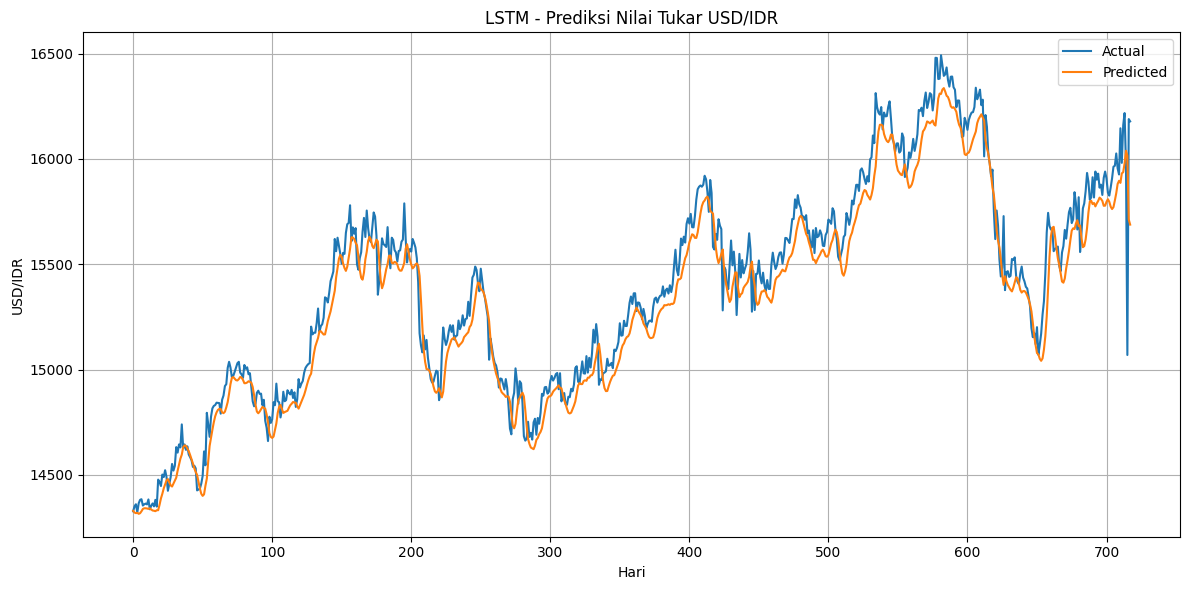

In [15]:
# Visualisasi
plt.figure(figsize=(12,6))
plt.plot(y_test_real, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title("LSTM - Prediksi Nilai Tukar USD/IDR")
plt.xlabel("Hari")
plt.ylabel("USD/IDR")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()